In [1]:
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.widgets as wid
import scipy.signal as sig
import seaborn as sns
import numpy.random as rd
from jupyterthemes import jtplot

In [2]:
jtplot.reset()
mp.style.use("seaborn")
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"
mp.rcParams["figure.figsize"] = (5*16/9,5)
mp.rcParams["figure.dpi"] = 100

In [3]:
t1 = np.arange(0, 5, 1/400)
t2 = np.arange(5, 10, 1/400)
t3 = np.arange(10, 15, 1/400)
t4 = np.arange(15, 20, 1/400)
tau = 2*np.pi
x1 = np.cos(tau*10*t1)
x2 = np.cos(tau*25*t2)
x3 = np.cos(tau*50*t3)
x4 = np.cos(tau*100*t4)
t = np.concatenate((t1, t2, t3, t4))
x = np.concatenate((x1, x2, x3, x4))

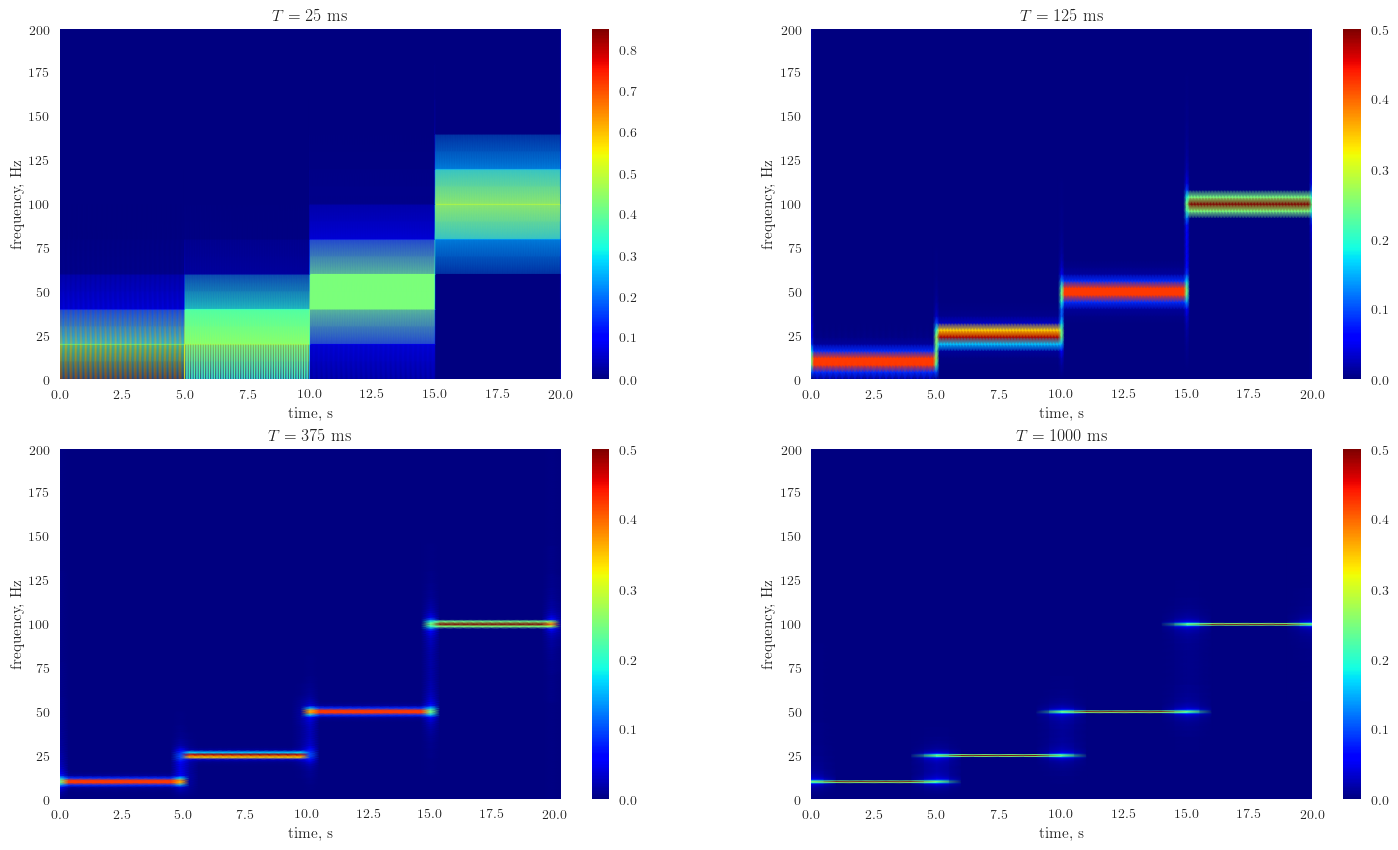

In [5]:
winds = [25e-3, 125e-3, 375e-3, 1000e-3]
fig = mp.figure(figsize=(5*16/9*2, 5*2))

for i, w in enumerate(winds):
    ax = fig.add_subplot(2, 2, i+1)
    f, t, Zxx = sig.stft(x, fs=400, nperseg=int(800*w), return_onesided=True)
    mp.pcolormesh(t, f, abs(Zxx), cmap="jet", shading="gouraud", vmin=abs(Zxx).min(), vmax=abs(Zxx).max())
    mp.xlabel("time, s")
    mp.ylabel("frequency, Hz")
    mp.title("$T = %i$ ms"%(w*1000))
    mp.grid(False)
    mp.colorbar()

mp.savefig("stft_varynperseg.png", dpi=300, bbox_inches="tight", transparent=True)
mp.show()